In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Housing.csv")

In [3]:
# Display basic information about the dataset
print("Dataset Info:\n")
df.info()
print("\nFirst 5 rows of dataset:\n", df.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

First 5 rows of dataset:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4      

In [4]:
# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Handle missing values (if any)
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicates removed. Current shape of dataset:", df.shape)


Duplicates removed. Current shape of dataset: (545, 13)


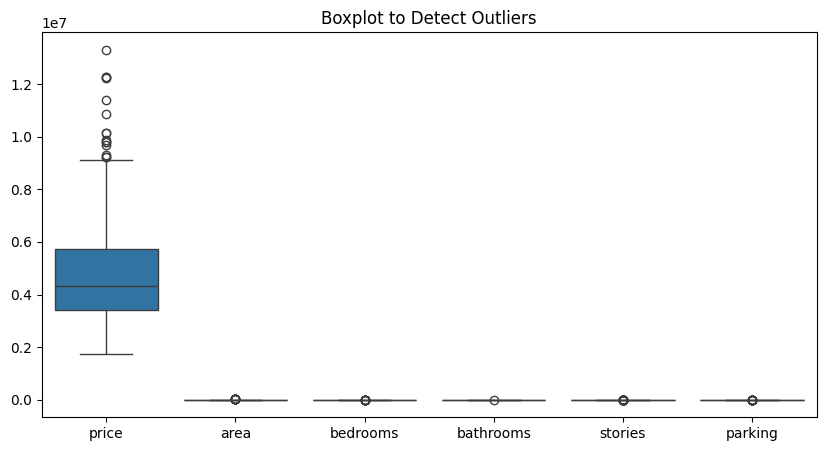

In [9]:
# Detect outliers using box plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot to Detect Outliers")
plt.show()


In [11]:
# Select only numerical columns for IQR calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame using only numeric columns
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape after removing outliers:", df.shape)



Shape after removing outliers: (463, 13)


In [12]:

# Standardize categorical values (fix typos or inconsistencies)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

<ipython-input-12-f601b440df74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.strip()


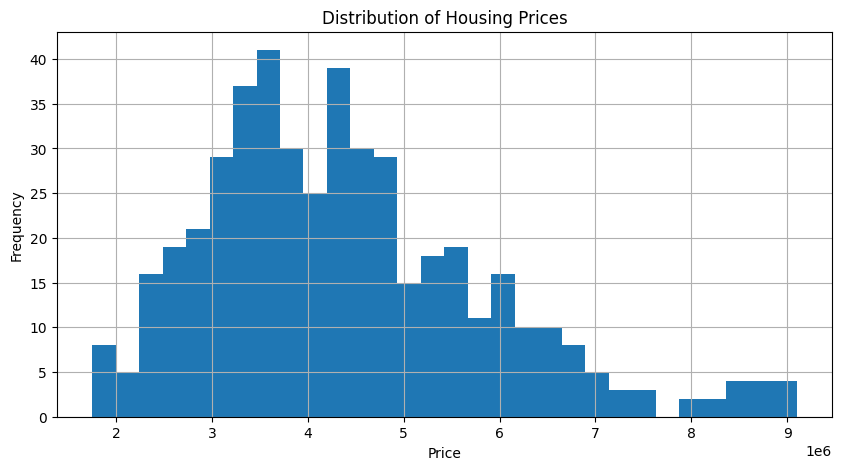

In [13]:

# Univariate Analysis
plt.figure(figsize=(10, 5))
df['price'].hist(bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Housing Prices")
plt.show()

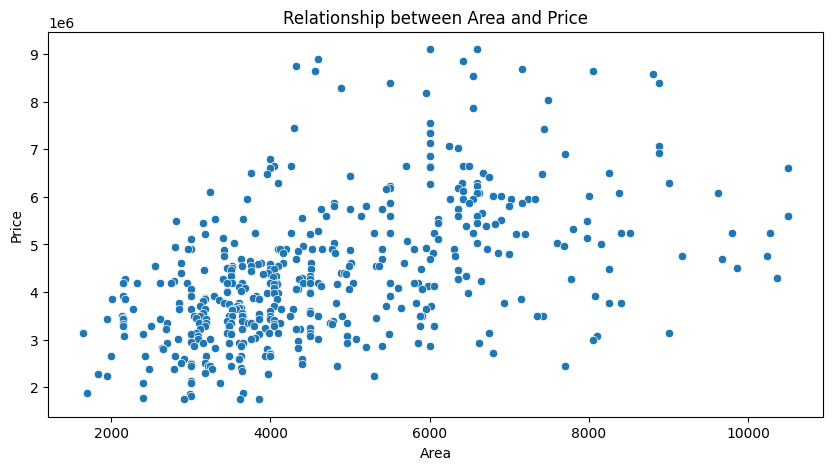

In [14]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['area'], y=df['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Relationship between Area and Price")
plt.show()

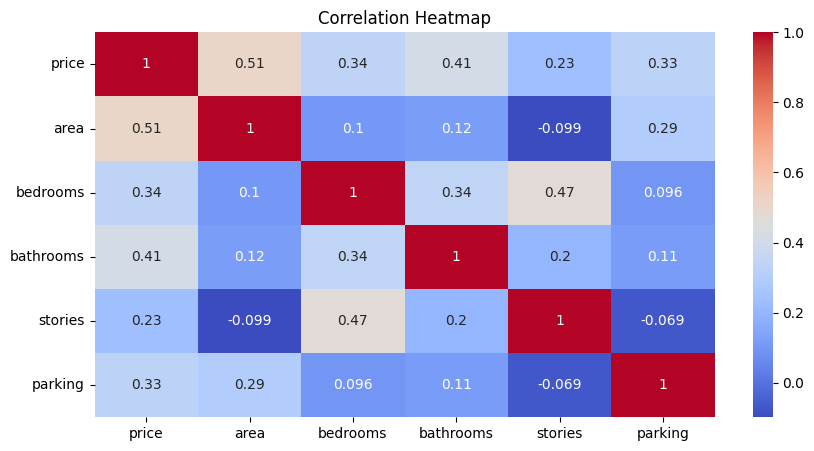

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


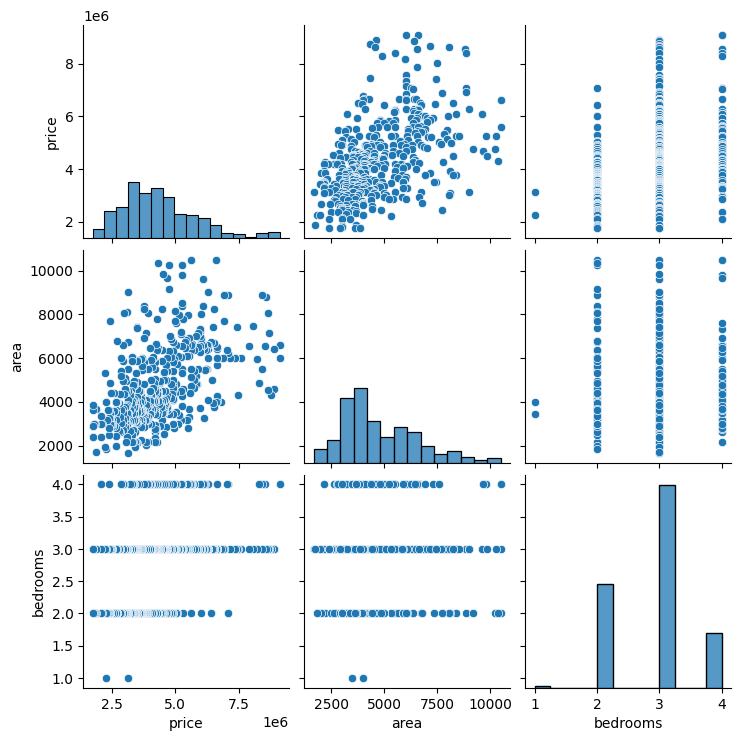


Data Analysis Completed Successfully!


In [18]:
# Pair Plot for Multivariate Analysis
sns.pairplot(df[['price', 'area', 'bedrooms']])
plt.show()

print("\nData Analysis Completed Successfully!")


In [20]:
df.to_csv("Final_Housing.csv", index=False)
print("✅ Final cleaned dataset saved as 'Final_Housing.csv'")


✅ Final cleaned dataset saved as 'Final_Housing.csv'
